In [21]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pandas.read_csv('../Datasets/denue_inegi.csv', encoding='ISO-8859-1')
df

C:\Users\lalor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,6862345,AGROPECUARIA CHARCOS DE QUEZADA,AGROPECUARIA CHARCOS DE QUEZADA SOCIEDAD DE PR...,115119,Otros servicios relacionados con la agricultura,6 a 10 personas,AVENIDA,UNIVERSIDAD,CALLE,BENJAMÍN MÉNDEZ,...,Aguascalientes,233,9,4492853716,MICHAEL.GALINDO@UGASA.COM.MX,NaN,Fijo,21.906992,-102.309807,2019-04
1,6905212,AGROPECUARIO LOS ALAMITOS,NaN,115119,Otros servicios relacionados con la agricultura,0 a 5 personas,CALLE,J. ENCARNACION PAYEN,CALLE,JARDINES ETERNOS,...,Aguascalientes,322,18,4499960472,NaN,NaN,Fijo,21.889926,-102.314009,2019-11
2,6166248,CENTRO ACUÍCOLA PABELLON DE HIDALGO,SAGARPA,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CALLE,NINGUNO,CALLE,NINGUNO,...,SEMARNAT [Centro Acuícola],78,800,NaN,NaN,WWW.GOB.MX/CONAPESCA,Fijo,22.167778,-102.345556,2010-07
3,6166233,G. ACUÍCOLA SANTA ROSA,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",6 a 10 personas,CARRETERA,SECTOR DE PRODUCCION N0 1 TERREMOTO EL LLANO A...,CARRETERA,CARRETERA PALO ALTO LA SOLEDAD,...,Santa Rosa [Granja Acuícola],69,800,NaN,NaN,NaN,Fijo,21.956298,-101.997312,2014-12
4,6166234,GRANJA ACUICOLA ARROYO DE LOS CABALLOS,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,PROLONGACION,CUAUHTUMOC,CARRETERA,LIBRAMIENTO CALVILLO JALPA,...,Arroyo Ojocalientillo,100,2,4492741517,MARTINSAU2720@HOTMAIL.COM,NaN,Fijo,21.837255,-102.710931,2014-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61884,24371,VISITADURIA DE NOTARIAS,SECRETARÍA DE GOBIERNO DEL ESTADO,931210,Administración pública en general,11 a 30 personas,CALLE,SARH,CALLE,HACIENDA,...,Aguascalientes,816,45,NaN,NaN,NaN,Fijo,21.875367,-102.279581,2014-12
61885,33009,VOCALÍA DEL REGISTRO FEDERAL DE ELECTORES,INSTITUTO NACIONAL ELECTORAL,931210,Administración pública en general,11 a 30 personas,AVENIDA,CONVENCION DE 1914 SUR,CALLE,DIEGO DE IBARRA,...,Aguascalientes,888,17,NaN,FELIPE.REYESRO@INE.ORG,WWW.INE.COM,Fijo,21.865938,-102.289821,2014-12
61886,50694,ZONA ESCOLAR 18 DE TELESECUNDARIA,INSTITUTO DE EDUCACIÓN DE AGUASCALIENTES,931610,Actividades administrativas de instituciones d...,0 a 5 personas,CALLE,GUADALUPE VICTORIA,CALLE,JOSE MARIA PINO SUAREZ,...,Palo Alto,158,35,4969673226.0,NaN,NaN,Fijo,21.919051,-101.959755,2014-12
61887,40740,ZONA MILITAR,SECRETARÍA DE LA DEFENSA NACIONAL,931410,Impartición de justicia y mantenimiento de la ...,11 a 30 personas,CALLE,RIO LERMA,OTRO (ESPECIFIQUE),SIN REFERENCIA,...,Aguascalientes,2013,25,NaN,NaN,NaN,Fijo,21.893411,-102.323357,2014-12


In [330]:
def H(x):
    m = len(x)
    values, counts = np.unique(x, return_counts = True)
    nCategories = len(values)
    probabilities = counts/m
    h = -np.sum(probabilities*np.log2(probabilities))
    hMax = -np.log2(1/nCategories)
    return h, hMax
def IMFranz(df , nombre_columna_1,nombre_columna_2):
    def set_values(row, value):
        return value[row]
    def calcular_Px(df,nombre_col= 'counts',nuevo_nombre='P(x)'):
        df[nuevo_nombre] = df[nombre_col] / df[nombre_col].sum()
        return df
    df2 = pandas.DataFrame(df[[nombre_columna_1,nombre_columna_2]].value_counts().reset_index())
    df2= df2.rename(columns={0: 'counts'})
    df2 = calcular_Px(df2,nuevo_nombre='P(x,y)')
    df3 = df2.groupby(nombre_columna_1).sum()['P(x,y)']
    df4 = df2.groupby(nombre_columna_2).sum()['P(x,y)']
    df3.to_dict()
    df4.to_dict()
    #return (df3, np.unique(df[nombre_columna_1].values, return_counts=True)[1]/len(df[nombre_columna_1].values))
    df2['P(y)'] = df2[nombre_columna_1].apply(set_values, args =(df3.to_dict(), )) 
    df2['P(x)'] = df2[nombre_columna_2].apply(set_values, args =(df4.to_dict(), )) 
    
    df2['P(x,y)/P(x)P(y)']=df2['P(x,y)']/(df2['P(x)']*df2['P(y)'])
    df2['log(f)']=np.log2(df2['P(x,y)/P(x)P(y)'])
    df2['P(x,y)log(f)']=df2['log(f)']*df2['P(x,y)']
    df2.append(df2.sum().rename('Total'))    
    
    return df2
def IM(x, y):
    df = pandas.DataFrame([x, y]).transpose().value_counts().reset_index().rename(columns={0: 'P(x, y)'})
    df['P(x, y)'] = df['P(x, y)']/df['P(x, y)'].sum()
    pX = df.groupby(x.name).sum()['P(x, y)'].to_dict()
    pY = df.groupby(y.name).sum()['P(x, y)'].to_dict()
    df['P(x)'] = [pX[iX] for iX in df[x.name]]
    df['P(y)'] = [pY[iY] for iY in df[y.name]]
    df['MI'] = df['P(x, y)']*np.log2(df['P(x, y)']/(df['P(x)']*df['P(y)']))
    return df['MI'].sum()

$ H(x) = - \sum_x P(x) log_2 P(x) $

$ IM(x, y) = \sum_x \sum_y P(x, y) log_2 \frac{ P(x, y) }{ P(x)P(y) } $

In [331]:
print(H(df['municipio'].values))
#IM(df['municipio'], df['tipo_vial'])
IM()
#IM(df, 'municipio', 'latitud')

(1.522370914986196, 3.4594316186372973)


0.06453673144009653

In [114]:
IMFranz(df, 'municipio', 'tipo_vial')

,municipio,tipo_vial,counts,"P(x,y)",P(y),P(x),"P(x,y)/P(x)P(y)",log(f),"P(x,y)log(f)"
0,Aguascalientes,CALLE,27688,0.448796,0.750916,0.612183,0.976284,-0.034627,-0.015540
1,Aguascalientes,AVENIDA,14122,0.228904,0.750916,0.284306,1.072199,0.100573,0.023021
2,Jesús María,CALLE,2778,0.045029,0.078646,0.612183,0.935256,-0.096567,-0.004348
3,Calvillo,CALLE,1666,0.027004,0.035838,0.612183,1.230850,0.299655,0.008092
4,Aguascalientes,BOULEVARD,1597,0.025886,0.750916,0.033909,1.016604,0.023758,0.000615
...,...,...,...,...,...,...,...,...,...
101,Aguascalientes,DIAGONAL,1,0.000016,0.750916,0.000016,1.331707,0.413277,0.000007
102,Rincón de Romos,CALLEJON,1,0.000016,0.034136,0.000211,2.253415,1.172113,0.000019
103,Rincón de Romos,CIRCUITO,1,0.000016,0.034136,0.005203,0.091260,-3.453877,-0.000056
104,San Francisco de los Romo,CALZADA,1,0.000016,0.023908,0.004944,0.137136,-2.866322,-0.000046


<AxesSubplot:xlabel='municipio', ylabel='count'>

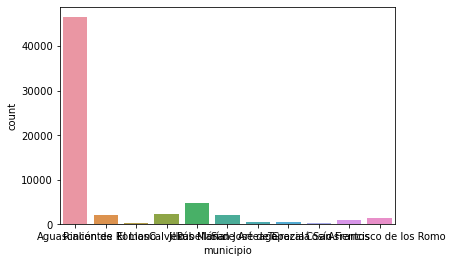

In [28]:
sns.countplot(data = df, x = 'municipio')

In [ ]:
sns.countplot(data = df, y = 'municipio')

In [ ]:
sns.countplot(data = df, y = 'municipio', hue = 'per_ocu')

In [ ]:
sns.countplot(data = df, hue = 'municipio', y = 'per_ocu')

## Filtros

In [ ]:
iUno = df['nombre_act'].values == 'Escuelas de educación primaria del sector privado'
iDos = df['nombre_act'].values == 'Escuelas de educación primaria del sector público'
i = np.logical_or(iUno, iDos)

In [ ]:
sns.countplot(y = df['municipio'].values[i], hue = df['nombre_act'].values[i])

In [ ]:
plt.figure()
plt.pie([10, 3, 4], labels = ['A', 'B', 'C'])


In [ ]:
plt.figure()
plt.subplot(1, 3, 1)
plt.title('Aguascalientes')
iAgs = df['municipio'].values == 'Aguascalientes'
cUno = np.sum(np.logical_and(iUno, iAgs))
cDos = np.sum(np.logical_and(iDos, iAgs))
plt.pie([cUno, cDos], labels=['Privadas', 'Públicas'])
plt.subplot(1, 3, 2)
plt.title('Calvillo')
iCal = df['municipio'].values == 'Calvillo'
cUno = np.sum(np.logical_and(iUno, iCal))
cDos = np.sum(np.logical_and(iDos, iCal))
plt.pie([cUno, cDos], labels=['Privadas', 'Públicas'])
plt.subplot(1, 3, 3)
plt.title('Cosío')
iCos = df['municipio'].values == 'Cosío'
cUno = np.sum(np.logical_and(iUno, iCos))
cDos = np.sum(np.logical_and(iDos, iCos))
plt.pie([cUno, cDos], labels=['Privadas', 'Públicas'])
plt.show()